In [1]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
We can notice that in some cases the replicated pixels at the edge of the image may not make 
sense to a model.


In [ ]:
visualisation  de brightness , vertical_flip , horizontal_flip 

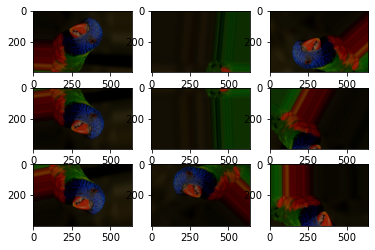

In [11]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200],horizontal_flip=True , vertical_flip=True , rotation_range=90 ,brightness_range=(0.5,0.6))
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [ ]:
MNIST : IMPORTING THE DATASET 

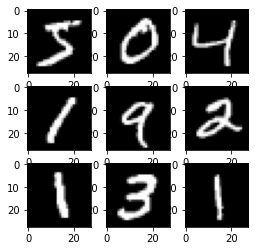

In [37]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load dbata
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()


-0.42407447 -0.04093817 2.8215446


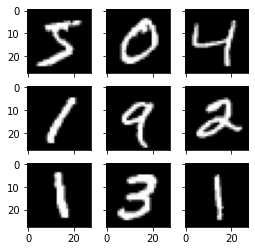

In [43]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
 # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True,figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
 # show the plot
    plt.show()
    break

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
datagen.flow(X_train, y_train, batch_size=9, shuffle=False, save_to_dir='images', save_prefix='aug', save_format='png')
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
 # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True,figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
 # show the plot
    plt.show()
    break